# Principal Component Analysis (PCA) for Breast Cancer Classification

## Project Overview
This notebook presents a comprehensive analysis of the breast cancer dataset using Principal Component Analysis (PCA) for dimensionality reduction followed by classification. We'll explore how PCA can improve model performance and provide insights into the underlying data structure.

## Business Problem
A healthcare institution wants to develop a system that can effectively classify breast cancer tumors as malignant or benign using digitized images of fine needle aspirates (FNA) of breast mass. Specifically, they want to:
1. Identify the most important features that differentiate malignant from benign tumors
2. Reduce the dimensionality of the data while maintaining classification accuracy
3. Create a reliable and interpretable model for clinical use
4. Understand the relationships between different tumor characteristics

## Approach
We will use Principal Component Analysis (PCA), a powerful dimensionality reduction technique, to:
- Transform high-dimensional data into a lower-dimensional space
- Identify the most important patterns in the data
- Improve classification model performance
- Visualize complex data relationships

## Contents
1. Introduction to Principal Component Analysis (PCA)
2. Data Loading and Exploration
3. Data Preprocessing
4. Exploratory Data Analysis
5. PCA Implementation
6. Classification with PCA-transformed Features
7. Model Evaluation and Comparison
8. Feature Importance Analysis
9. Business Insights and Recommendations
10. Conclusion

## 1. Introduction to Principal Component Analysis (PCA)

### What is PCA?
Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a dataset with many features into a lower-dimensional space while preserving as much variance as possible. It creates new uncorrelated variables called principal components that capture the directions of maximum variance in the data.

### Mathematical Intuition

#### The Core Concept
PCA works by finding the directions (principal components) in the feature space along which the data varies the most. Mathematically, it:

1. **Standardizes the data** (mean=0, variance=1)
2. **Computes the covariance matrix**:
   
   $$\Sigma = \frac{1}{n-1} X^T X$$
   
   where X is the standardized data matrix.

3. **Finds eigenvectors and eigenvalues** of the covariance matrix:
   
   $$\Sigma v = \lambda v$$
   
   where v is an eigenvector and λ is the corresponding eigenvalue.

4. **Sorts eigenvectors** by decreasing eigenvalues (largest variance first)
5. **Projects the data** onto the new feature space:
   
   $$Z = XV$$
   
   where V is the matrix of eigenvectors and Z is the transformed data.

#### Variance Explained
The proportion of variance explained by each principal component is:

$$\text{Variance Explained}_i = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}$$

where λᵢ is the eigenvalue of the i-th principal component and p is the total number of features.

#### Cumulative Variance
The cumulative variance explained by the first k principal components is:

$$\text{Cumulative Variance}_k = \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{j=1}^{p} \lambda_j}$$

### Key Advantages of PCA
1. **Dimensionality Reduction**: Reduces the number of features while retaining most of the information
2. **Removes Multicollinearity**: Creates uncorrelated features
3. **Noise Reduction**: Often eliminates noise that exists in many dimensions
4. **Visualization**: Enables visualization of high-dimensional data
5. **Computational Efficiency**: Reduces computational requirements for subsequent analyses

### Limitations of PCA
1. **Linear Transformations Only**: Cannot capture non-linear relationships
2. **Interpretability Challenges**: Principal components can be difficult to interpret
3. **Sensitive to Scaling**: Results depend on feature scaling
4. **Information Loss**: Some information is inevitably lost in dimensionality reduction

## 2. Data Loading and Exploration

Let's begin by loading the breast cancer dataset and examining its structure:


In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [58]:
# Create a DataFrame for easier data manipulation
feature_names = breast_cancer.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = ['Malignant' if t == 0 else 'Benign' for t in y]

In [59]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,Malignant


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [60]:
# Basic information about the dataset
print("\nDataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target distribution: {np.bincount(y)}")
print(f"Target classes: {breast_cancer.target_names}")


Dataset Information:
Number of samples: 569
Number of features: 30
Target distribution: [212 357]
Target classes: ['malignant' 'benign']


In [61]:
print("\nStatistical Summary:")
display(df.describe().T)


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [62]:
print("\nFeature details:")
print("- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass")
print("- They describe characteristics of the cell nuclei present in the image")
print("- Ten real-valued features are computed for each cell nucleus:")
print("  1. radius (mean of distances from center to points on the perimeter)")
print("  2. texture (standard deviation of gray-scale values)")
print("  3. perimeter")
print("  4. area")
print("  5. smoothness (local variation in radius lengths)")
print("  6. compactness (perimeter^2 / area - 1.0)")
print("  7. concavity (severity of concave portions of the contour)")
print("  8. concave points (number of concave portions of the contour)")
print("  9. symmetry")
print("  10. fractal dimension ('coastline approximation' - 1)")
print("- For each feature, the mean, standard error (SE), and 'worst' or largest value were computed")
print("- This results in 30 features in total (10 features × 3 metrics)")


Feature details:
- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass
- They describe characteristics of the cell nuclei present in the image
- Ten real-valued features are computed for each cell nucleus:
  1. radius (mean of distances from center to points on the perimeter)
  2. texture (standard deviation of gray-scale values)
  3. perimeter
  4. area
  5. smoothness (local variation in radius lengths)
  6. compactness (perimeter^2 / area - 1.0)
  7. concavity (severity of concave portions of the contour)
  8. concave points (number of concave portions of the contour)
  9. symmetry
  10. fractal dimension ('coastline approximation' - 1)
- For each feature, the mean, standard error (SE), and 'worst' or largest value were computed
- This results in 30 features in total (10 features × 3 metrics)


In [63]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum().sum())
if df.isnull().sum().sum() == 0:
    print("No missing values found.")

Missing values in each column:
0
No missing values found.


In [64]:
X = df.drop(['target','diagnosis'], axis=1)
y = df['target']

In [65]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
# Create a DataFrame with scaled features for EDA
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
df_scaled['target'] = y
df_scaled['diagnosis'] = ['Malignant' if t == 0 else 'Benign' for t in y]

In [69]:
df_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0,Malignant
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0,Malignant
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0,Malignant
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0,Malignant
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0,Malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0,Malignant
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0,Malignant
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0,Malignant
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0,Malignant



Scaled data summary (should have mean ≈ 0 and std ≈ 1):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15,0.627417
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918


In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [51]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Testing set class distribution: {np.bincount(y_test)}")


Training set size: 455 samples
Testing set size: 114 samples
Training set class distribution: [170 285]
Testing set class distribution: [42 72]


In [52]:
## 4. Exploratory Data Analysis

In [53]:
# Group features by their types (mean, standard error, worst)
mean_features = [col for col in X.columns if 'mean' in col]
se_features = [col for col in X.columns if 'se' in col]
worst_features = [col for col in X.columns if 'worst' in col]

In [57]:
df['target'].value_counts()

,count
target,
1,357
0,212


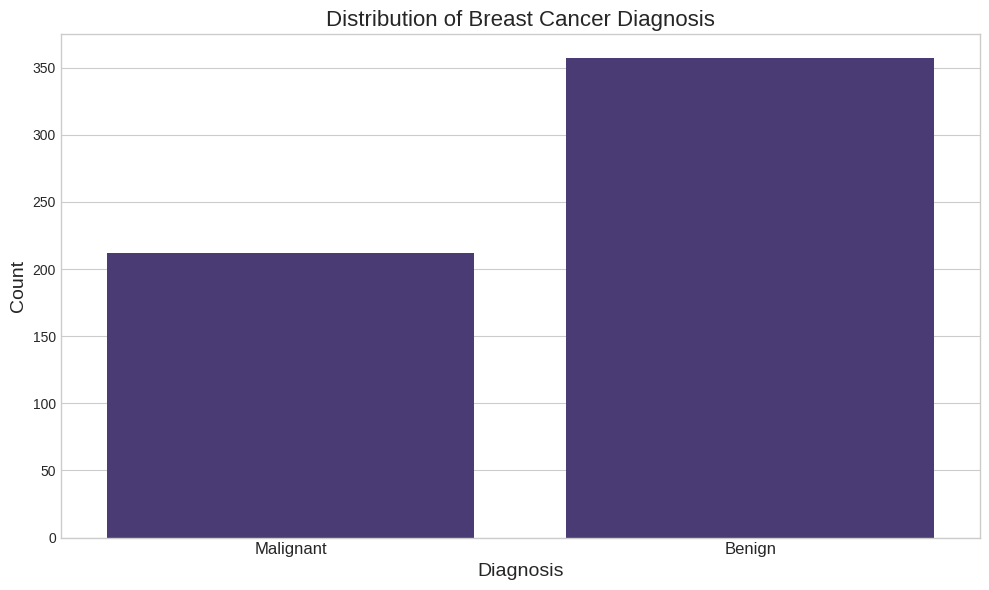

In [70]:
# Distribution of target classes
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Breast Cancer Diagnosis', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

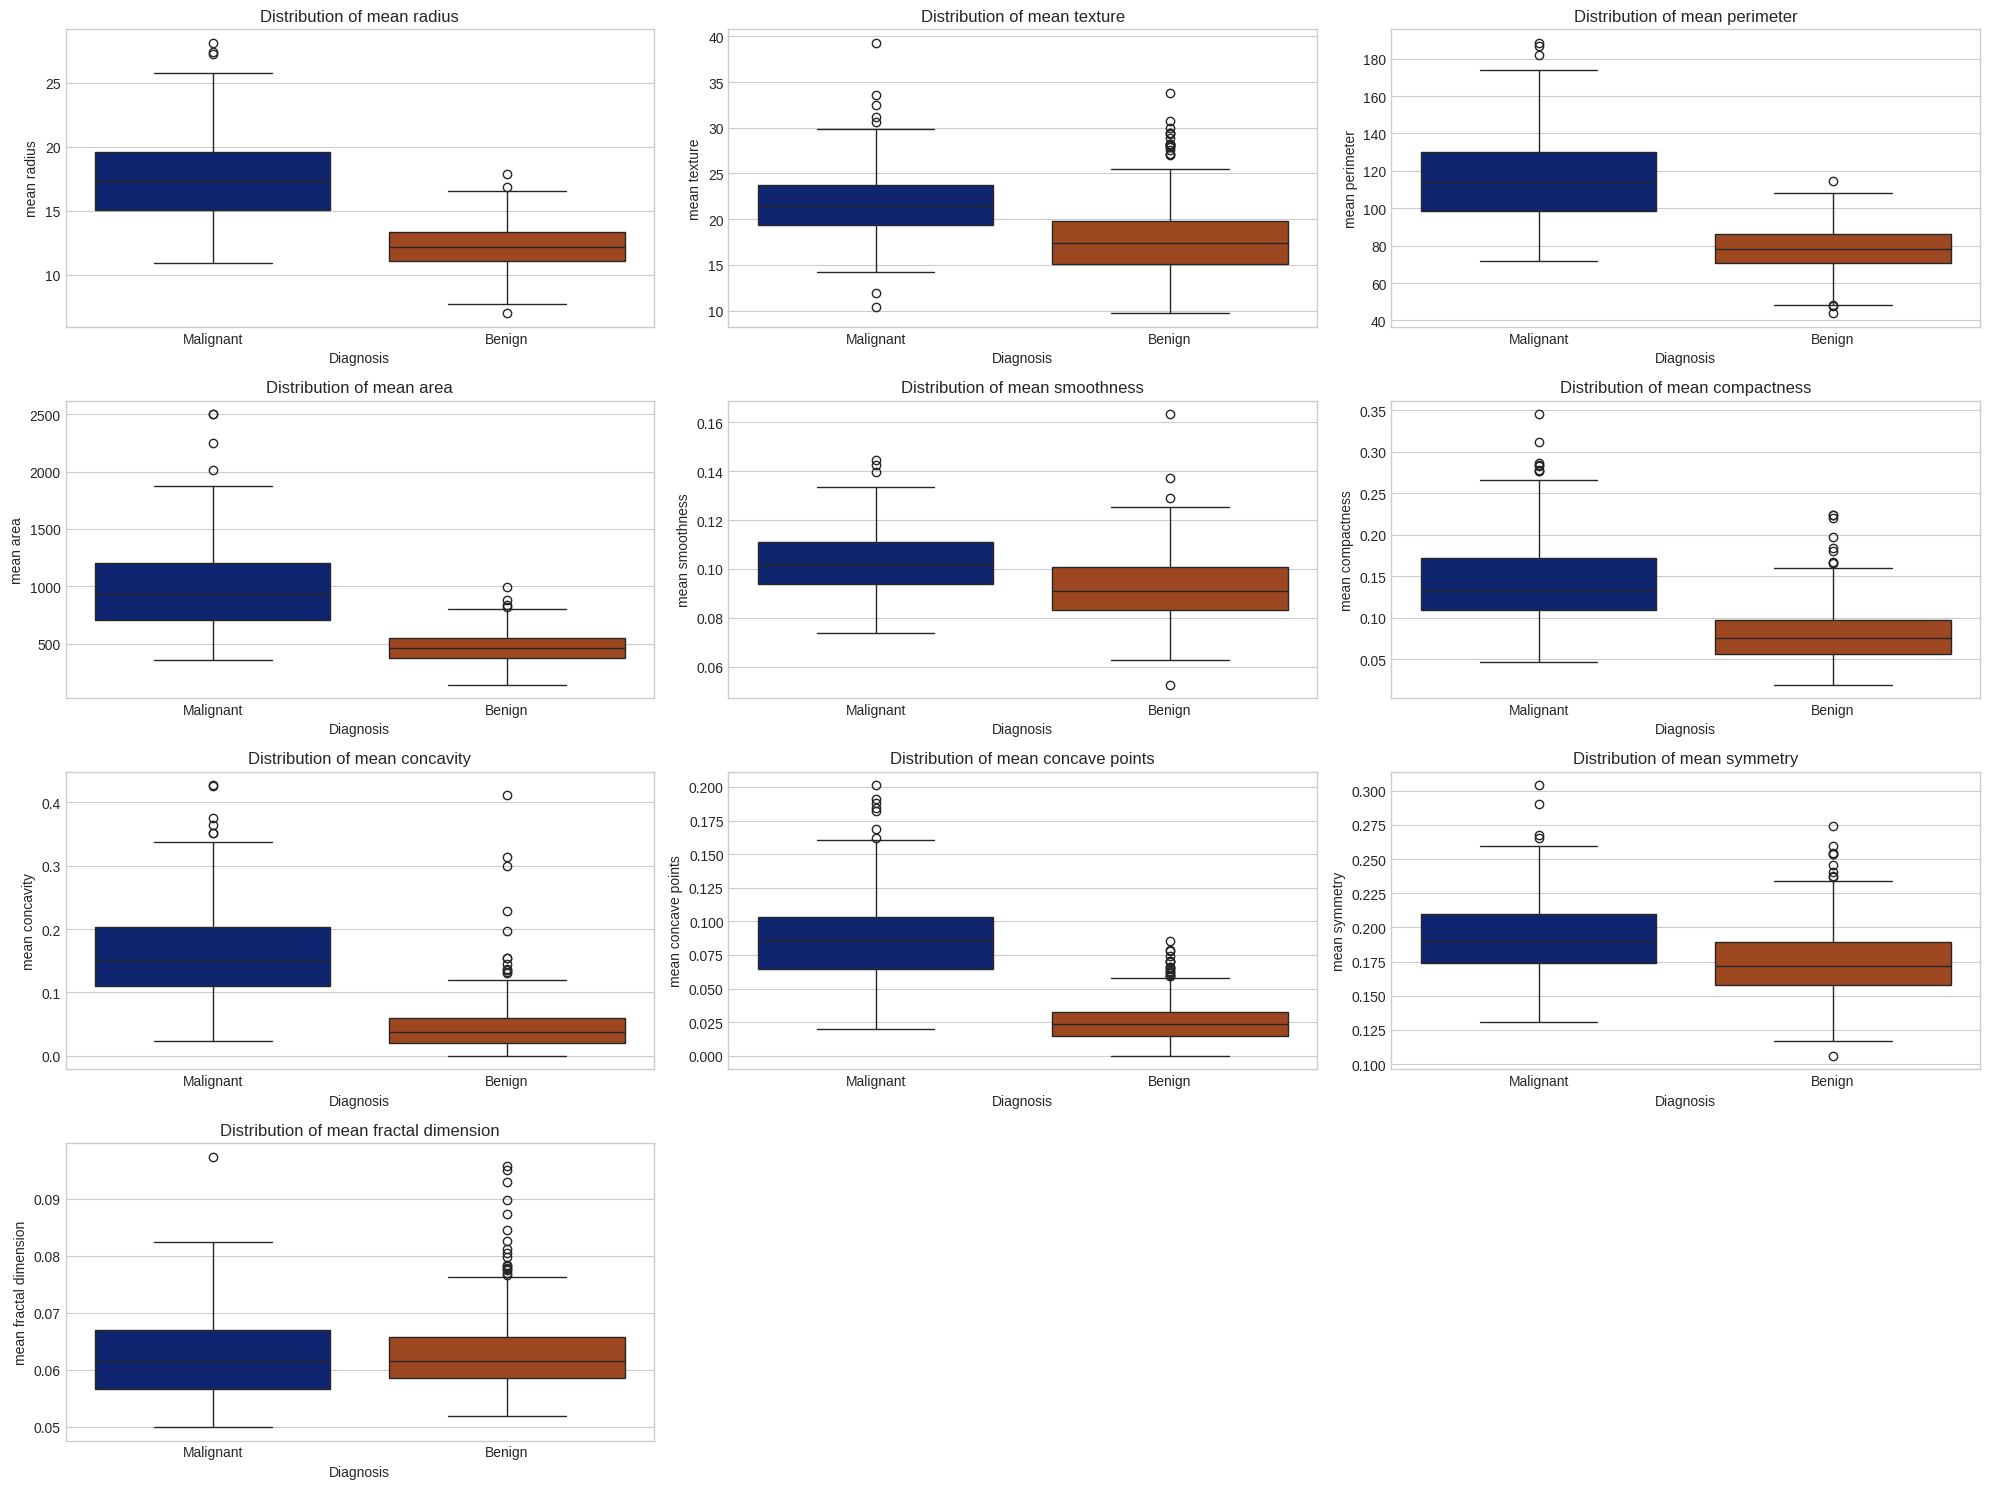

In [76]:
# Create box plots for mean features by diagnosis
plt.figure(figsize=(20, 15))

for i, feature in enumerate(mean_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette = 'dark')
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel('Diagnosis', fontsize=10)
    plt.ylabel(feature, fontsize=10)

plt.tight_layout()
plt.show()

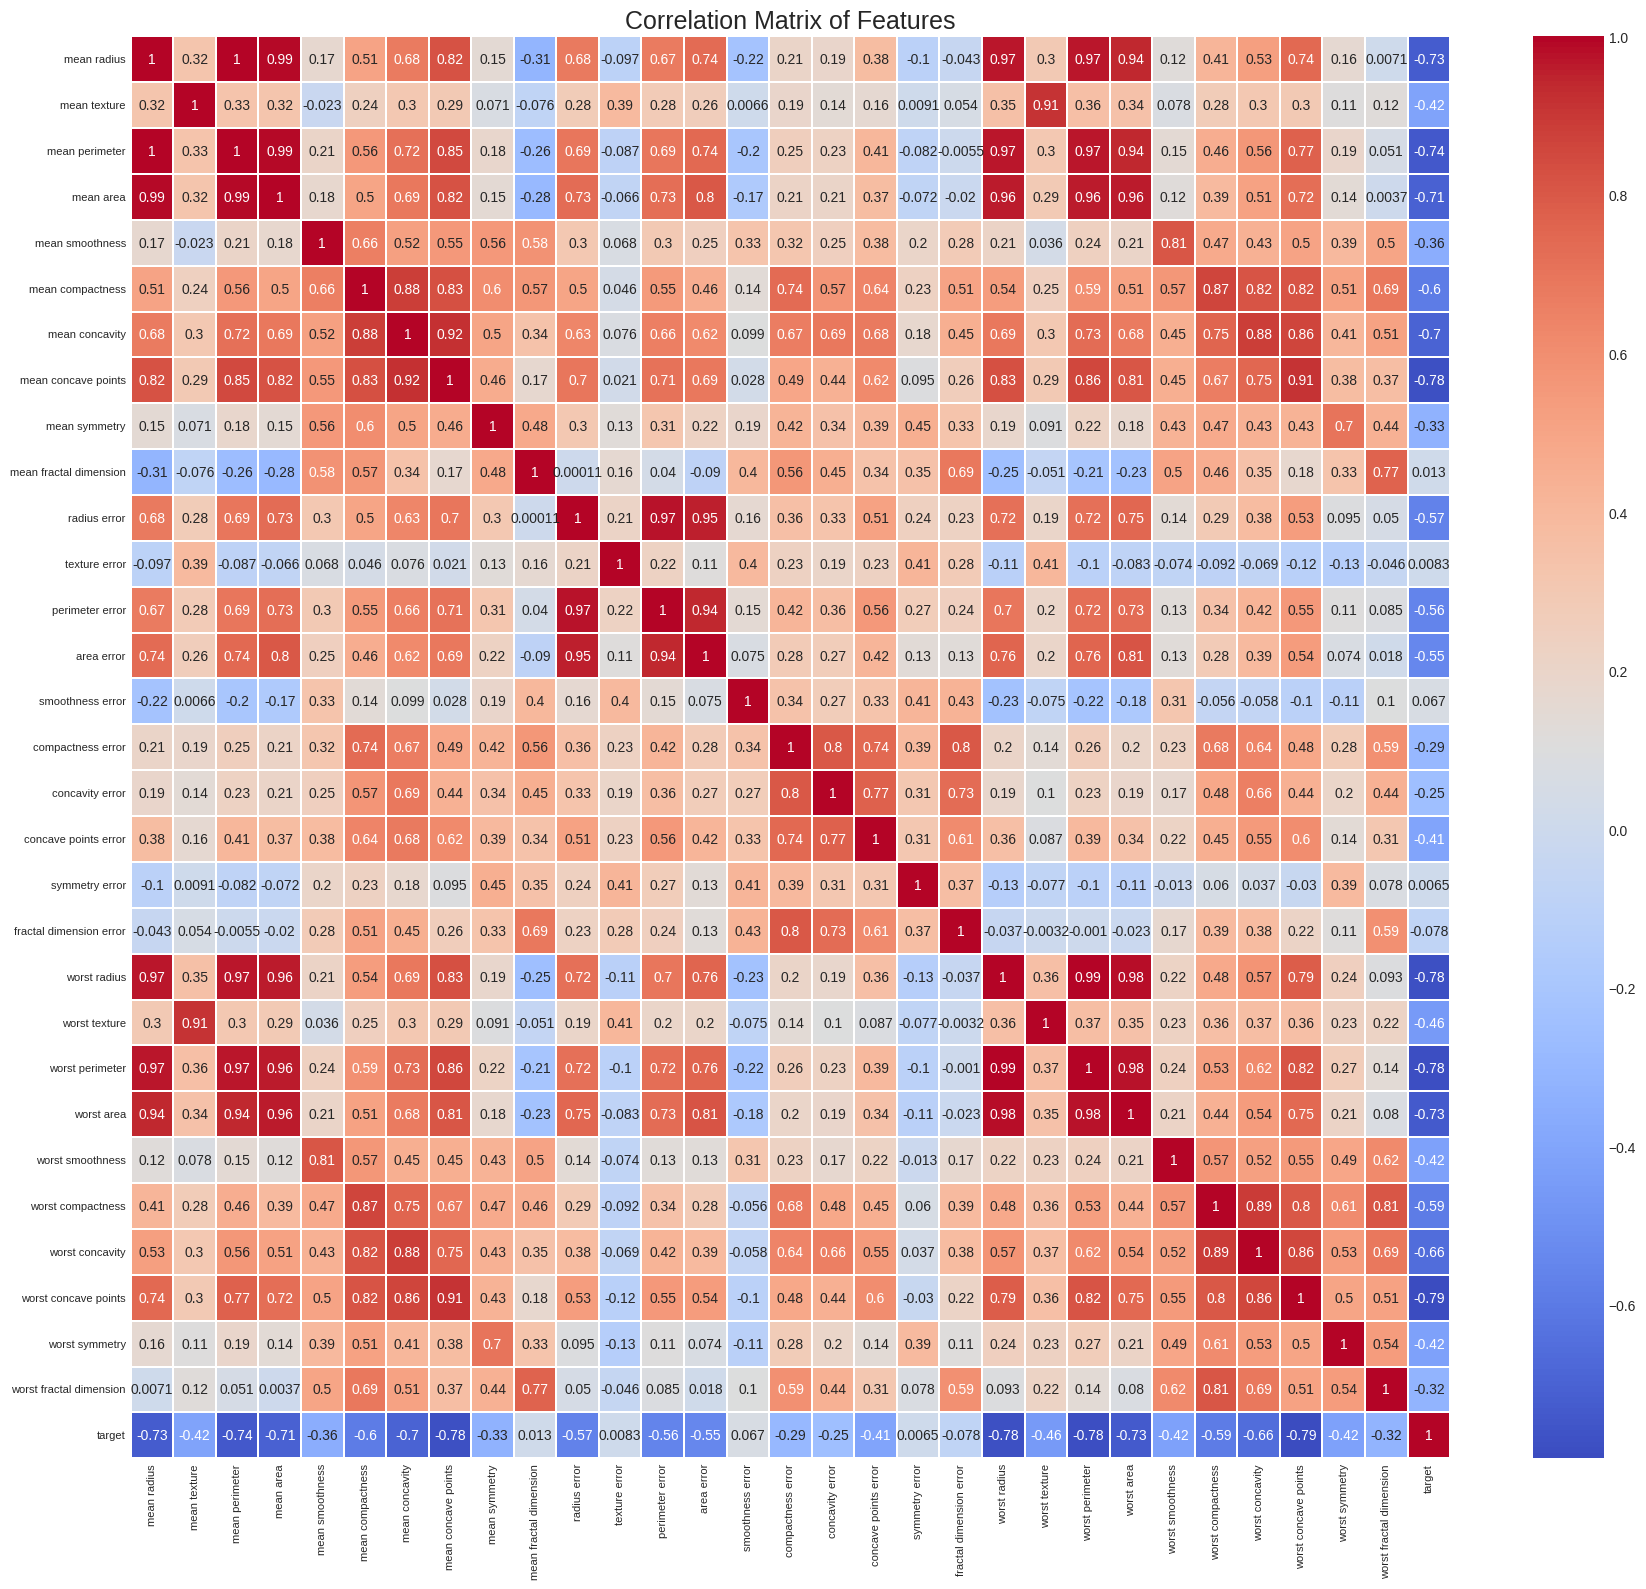

In [80]:
# Correlation matrix
plt.figure(figsize=(18, 16))
corr_matrix = df.drop(['diagnosis'], axis=1).corr()
# mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Matrix of Features', fontsize=18)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Observations from the correlation matrix:

 1. High Correlation within Feature Groups:
    - Features with "mean," "se," and "worst" prefixes show strong positive correlations within their respective groups.  This indicates that these groups of features capture similar information about the cell nuclei. For example, 'radius_mean' is highly correlated with 'perimeter_mean' and 'area_mean' which is expected.

 2. Correlation between Mean and Worst Features:
    - There are strong positive correlations between "mean" and "worst" features of the same characteristic (e.g., 'radius_mean' and 'radius_worst'). This suggests that larger mean values tend to correspond with larger "worst" values.  This makes intuitive sense - larger average values would likely lead to larger maximum values.

 3. Lower Correlation between Mean/Worst and SE Features:
   - Correlations between the "mean" or "worst" features and the "se" (standard error) features are generally weaker.  This suggests that the variability of a feature (standard error) is not as strongly linked to its mean or maximum value.


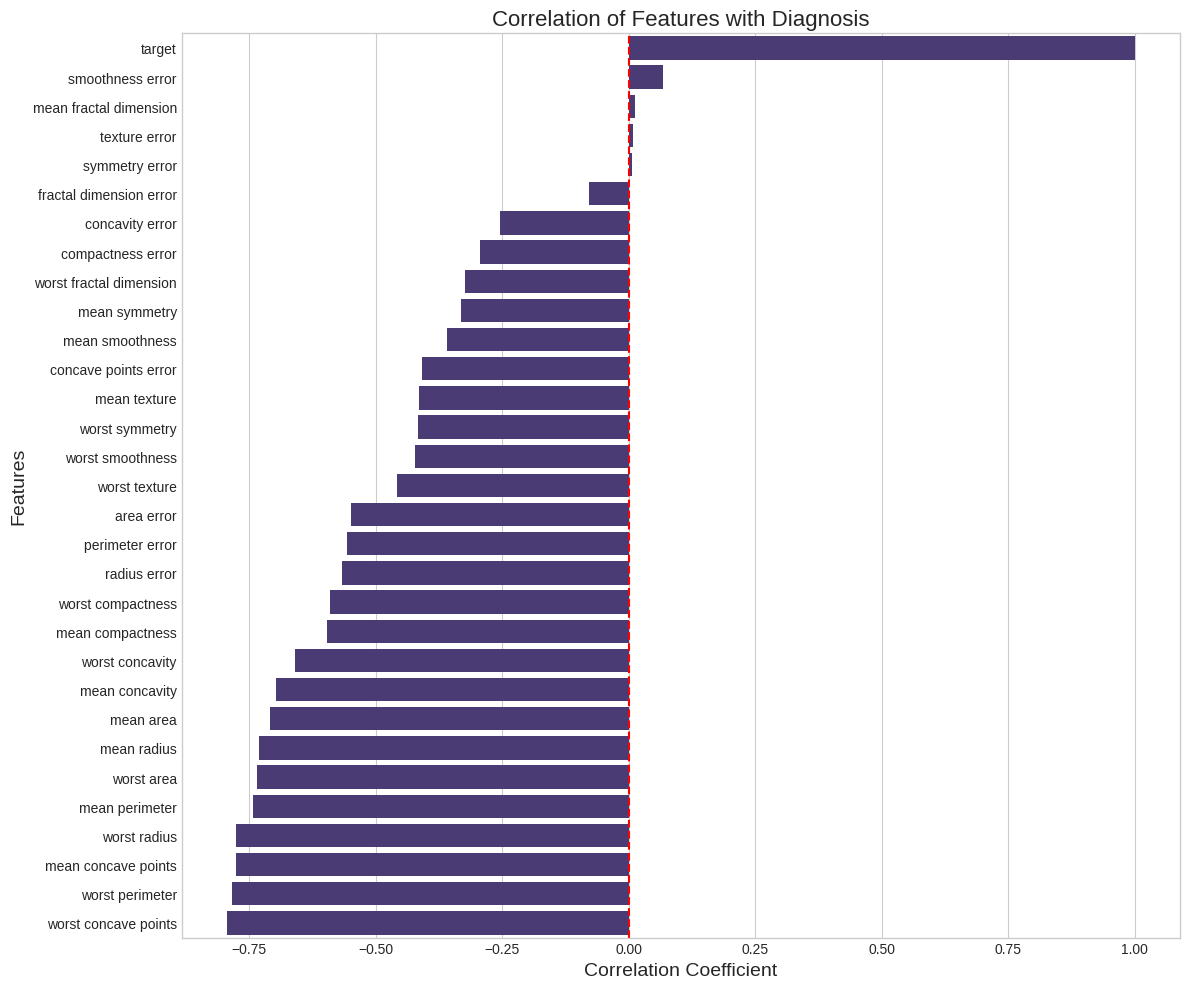

In [82]:
# Correlation with target
target_corr = df.drop(['diagnosis'], axis=1).corrwith(df['target']).sort_values(ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title('Correlation of Features with Diagnosis', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [83]:
print("Top 5 features positively correlated with benign diagnosis:")
display(target_corr.head())

Top 5 features positively correlated with benign diagnosis:


,0
target,1.000000
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522


In [84]:
## 5. PCA Implementation

In [85]:
# Initialize PCA without specifying number of components (will return all)
pca = PCA()
pca.fit(X_scaled)

PCA()

In [86]:
# Transform the data
X_pca = pca.transform(X_scaled)

In [87]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


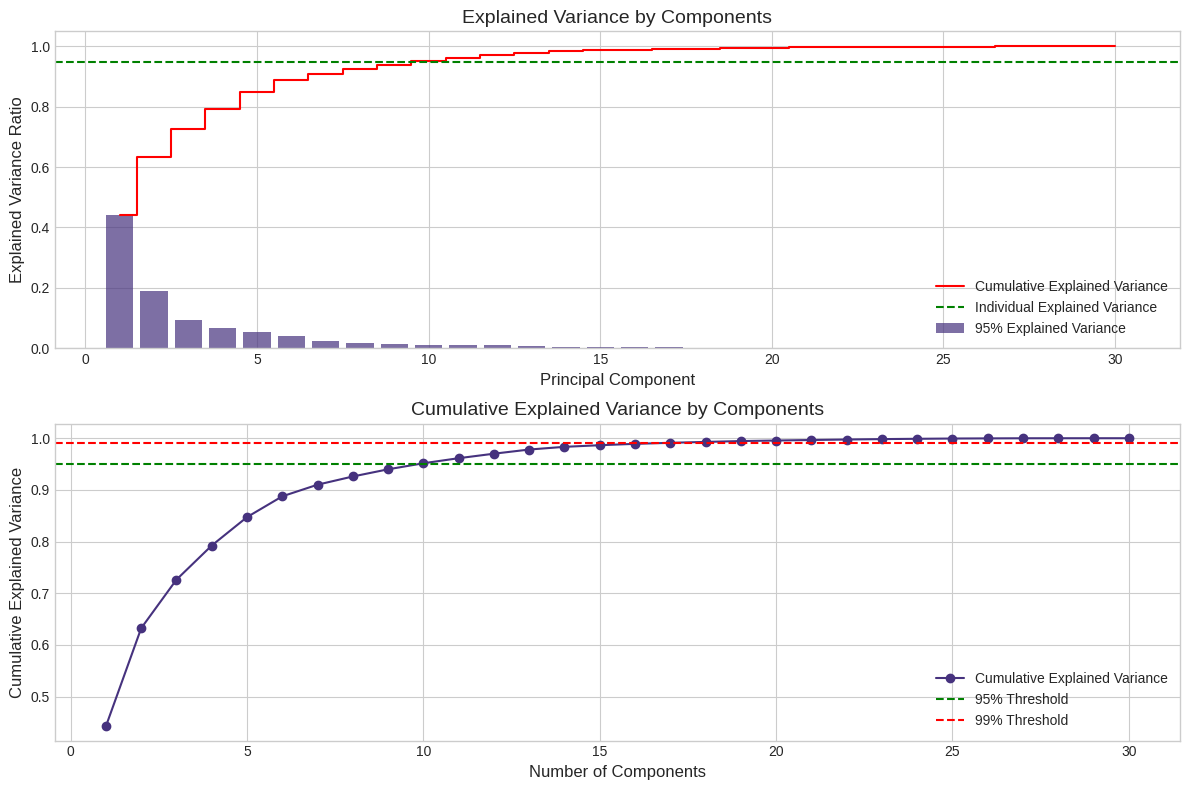

In [88]:
# Plot explained variance
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.step(range(1, len(explained_variance) + 1), cumulative_variance, where='mid', color='red')
plt.axhline(y=0.95, linestyle='--', color='green')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance by Components', fontsize=14)
plt.legend(['Cumulative Explained Variance', 'Individual Explained Variance', '95% Explained Variance'])

plt.subplot(2, 1, 2)
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, linestyle='--', color='green')
plt.axhline(y=0.99, linestyle='--', color='red')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance by Components', fontsize=14)
plt.legend(['Cumulative Explained Variance', '95% Threshold', '99% Threshold'])

plt.tight_layout()
plt.show()

In [89]:
# Find number of components needed for 95% and 99% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"Number of components needed for 95% variance: {n_components_95}")
print(f"Number of components needed for 99% variance: {n_components_99}")
print(f"Total number of original features: {X.shape[1]}")

Number of components needed for 95% variance: 10
Number of components needed for 99% variance: 17
Total number of original features: 30


In [90]:
# Print explained variance for each component
for i, ratio in enumerate(explained_variance[:10]):
    print(f"PC{i+1} explained variance ratio: {ratio:.4f}, Cumulative: {cumulative_variance[i]:.4f}")

# Create PCA with number of components for 95% variance
pca_95 = PCA(n_components=n_components_95)
X_pca_95 = pca_95.fit_transform(X_scaled)

PC1 explained variance ratio: 0.4427, Cumulative: 0.4427
PC2 explained variance ratio: 0.1897, Cumulative: 0.6324
PC3 explained variance ratio: 0.0939, Cumulative: 0.7264
PC4 explained variance ratio: 0.0660, Cumulative: 0.7924
PC5 explained variance ratio: 0.0550, Cumulative: 0.8473
PC6 explained variance ratio: 0.0402, Cumulative: 0.8876
PC7 explained variance ratio: 0.0225, Cumulative: 0.9101
PC8 explained variance ratio: 0.0159, Cumulative: 0.9260
PC9 explained variance ratio: 0.0139, Cumulative: 0.9399
PC10 explained variance ratio: 0.0117, Cumulative: 0.9516


In [91]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    data=X_pca_95,
    columns=[f'PC{i+1}' for i in range(n_components_95)]
)
pca_df['diagnosis'] = df['diagnosis']

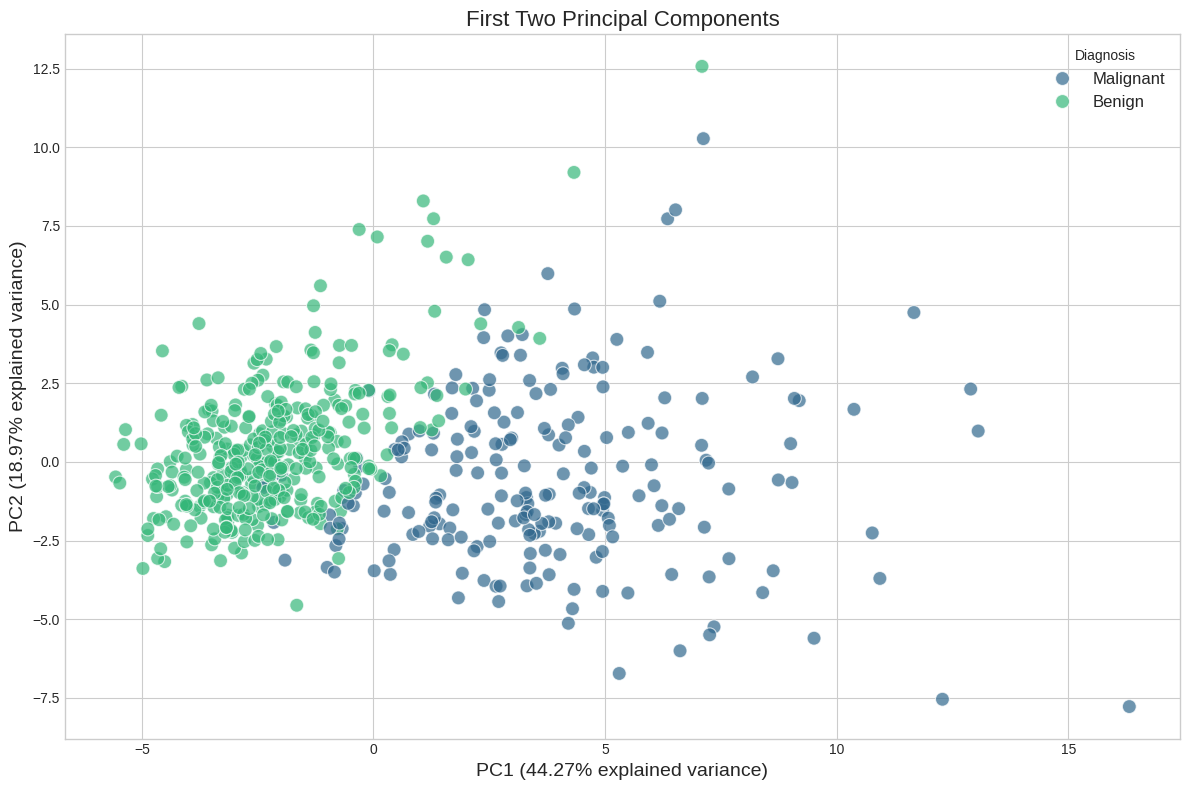

In [93]:
# Visualize the first two principal components
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df, s=100, alpha=0.7, palette = 'viridis')
plt.title('First Two Principal Components', fontsize=16)
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} explained variance)', fontsize=14)
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} explained variance)', fontsize=14)
plt.legend(title='Diagnosis', fontsize=12)
plt.tight_layout()
plt.show()

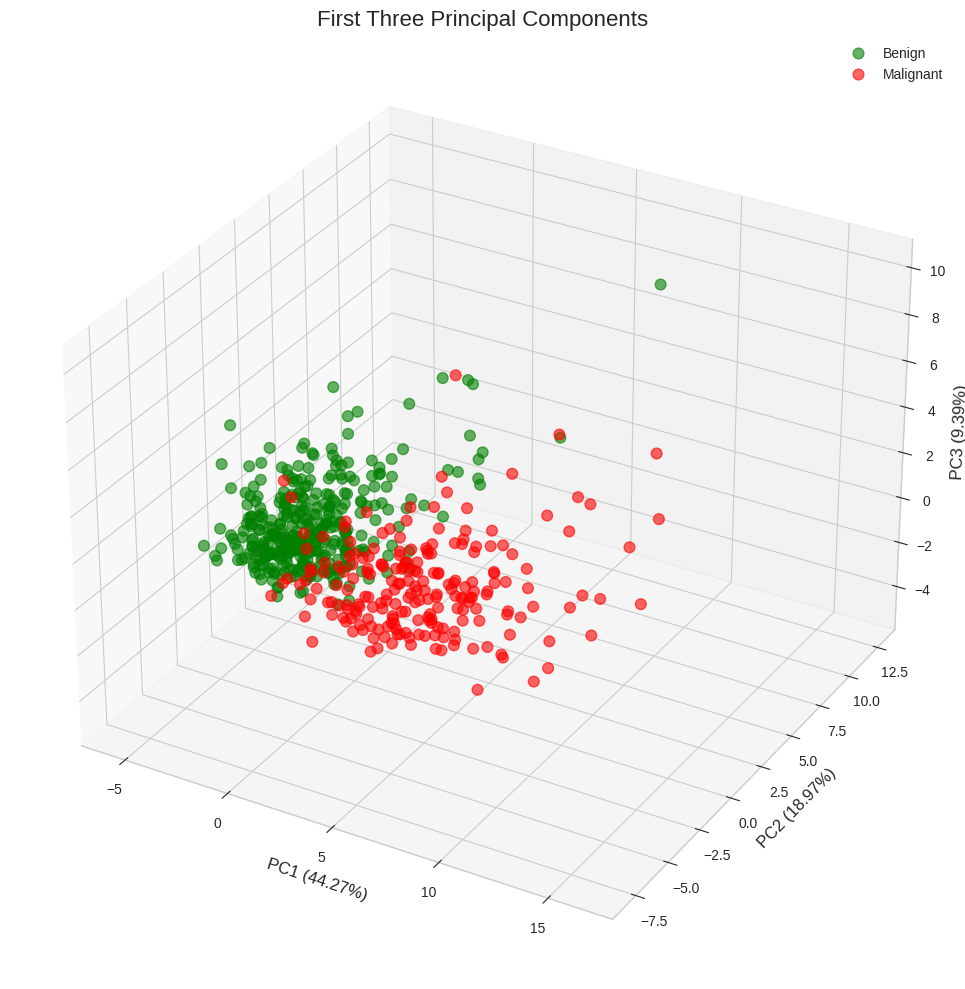

In [94]:
# 3D plot of the first three principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

benign = pca_df[pca_df['diagnosis'] == 'Benign']
malignant = pca_df[pca_df['diagnosis'] == 'Malignant']

ax.scatter(benign['PC1'], benign['PC2'], benign['PC3'], c='g', s=60, alpha=0.6, label='Benign')
ax.scatter(malignant['PC1'], malignant['PC2'], malignant['PC3'], c='r', s=60, alpha=0.6, label='Malignant')

ax.set_xlabel(f'PC1 ({explained_variance[0]:.2%})', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_variance[1]:.2%})', fontsize=12)
ax.set_zlabel(f'PC3 ({explained_variance[2]:.2%})', fontsize=12)
ax.set_title('First Three Principal Components', fontsize=16)
ax.legend()
plt.tight_layout()
plt.show()